In [82]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import numpy as np
# import the necessary packages

In [83]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False) # fetch the MNIST dataset

In [84]:
X, y = mnist["data"].astype(np.int64), mnist["target"].astype(np.int64) # get data and target labels
X.shape # show shape of input matrix

(70000, 784)

Describe the data.

In [85]:
print("Target Categories:", np.unique(y)) # show all possible labels
print("Feature range:", np.min(X), np.max(X)) # show range of features

Target Categories: [0 1 2 3 4 5 6 7 8 9]
Feature range: 0 255


We have 0 to 255 as pixel range. Time to visualize some handwritten digits.

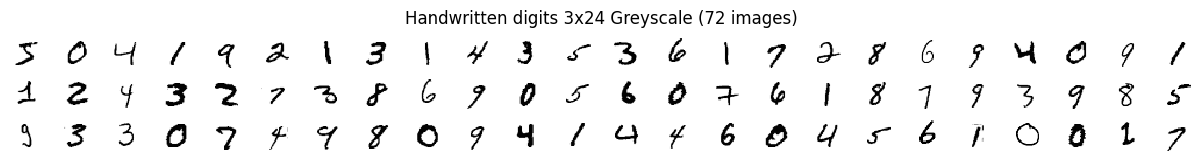

In [86]:
wsize = 24 # grid width
hsize = 3 # grid height
fig, axes = plt.subplots(hsize,wsize,figsize=(wsize/2,hsize/2),layout="constrained") # create subplots

c = 0
for i in range(hsize):
    for j in range(wsize):
        axes[i][j].imshow(X[c].reshape((28,28)), interpolation='none', cmap=cm.Greys) # display digit in the grid
        axes[i][j].axis('off') # turn off axes
        c += 1
plt.suptitle(f"Handwritten digits {hsize}x{wsize} Greyscale ({wsize*hsize} images)")
plt.show() # show the plot

Now split the dataset into train and test.

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # split data to train and test

Now let's use pipeline to train a linear SVM while using the one-versus-all classifier for the dataset. But first we will scale dataset using min max scaler.

In [88]:
linear_svm_clf = Pipeline([('scaler', MinMaxScaler()), # use min max scaler to scale the pixel ranges from 0-255 to 0-1
                           ('linear_svc', LinearSVC(loss='hinge',multi_class='ovr'))]) # use linear SVM and set the necessary parameters
# choose hinge loss as it is default for SVM and choose one versus rest as classifier as we have 10 classes

Now train by using the pipeline.

In [89]:
linear_svm_clf.fit(X_train, y_train) # fit the dataset using the training set

C:\Users\abhin\AppData\Roaming\Python\Python312\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('scaler', MinMaxScaler()),
                ('linear_svc', LinearSVC(loss='hinge'))])

In [90]:
accuracy = linear_svm_clf.score(X_test, y_test) # get the accuracy using the testing set
accuracy

0.9198571428571428

Achieved 91% accuracy with the linear SVM classifier so not that great. Let's now use another pipeline that uses rbf kernel with SVM instead.

In [91]:
kernel_svm_clf = Pipeline([('scaler', MinMaxScaler()), # use min max scaler to scale the pixel ranges from 0-255 to 0-1
                           ('kernel_svc', SVC(kernel='rbf',gamma='scale',decision_function_shape='ovr'))]) # use kernel SVM and set the necessary parameters
# choose rbf as the kernel and choose one versus rest as classifier as we have 10 classes

Now train the pipeline using the kernel SVM.

In [92]:
kernel_svm_clf.fit(X_train, y_train) # fit the dataset using the training set

Pipeline(steps=[('scaler', MinMaxScaler()), ('kernel_svc', SVC())])

In [93]:
accuracy = kernel_svm_clf.score(X_test, y_test) # get the accuracy using the testing set
accuracy

0.9807142857142858

98% accuracy is much better. Just for fun to get the highest accuracy, let's also train one vs one classifiers using kernel svm to see what the potential is.